#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
data = vipoooool_new_plant_diseases_dataset_path = kagglehub.dataset_download('vipoooool/new-plant-diseases-dataset')

print('Data source import complete.')


Data source import complete.


## Importing Libraries

In [2]:
import os
data = os.path.join(data, 'New Plant Diseases Dataset(Augmented)', 'New Plant Diseases Dataset(Augmented)')

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data, 'train'),
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data, 'valid'),
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()

In [10]:
## Building Convolution Layer

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Dropout(0.25)) # To avoid Overfitting

model.add(Flatten())

model.add(Dense(units=1500,activation='relu'))

model.add(Dropout(0.4))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [16]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 146s 67ms/step - accuracy: 0.9843 - loss: 0.0491 - val_accuracy: 0.9692 - val_loss: 0.1046
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9847 - loss: 0.0476 - val_accuracy: 0.9488 - val_loss: 0.1928
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.9844 - loss: 0.0475 - val_accuracy: 0.9712 - val_loss: 0.1028
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 61ms/step - accuracy: 0.9870 - loss: 0.0413 - val_accuracy: 0.9527 - val_loss: 0.1837
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 62ms/step - accuracy: 0.9889 - loss: 0.0350 - val_accuracy: 0.9525 - val_loss: 0.1832
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 148s 65ms/step - accuracy: 0.9900 - loss: 0.0339 - val_accuracy: 0.9789 - val_loss: 0.0759
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 193s 61ms/step - accuracy: 0.9908 - loss: 0.0304 - val_accuracy: 0.9768 - val_loss: 0.0877
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 149s 64ms/step - accuracy: 

## Model Evaluation

In [17]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 58s 27ms/step - accuracy: 0.9936 - loss: 0.0184


In [18]:
print(train_loss,train_acc)

0.01662367396056652 0.9943239092826843


In [19]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9716 - loss: 0.1062


In [20]:
print(val_loss,val_acc)

0.09946160018444061 0.9721716642379761


### Saving Model

In [21]:
model.save("trained_model.keras")

In [22]:
training_history.history

{'accuracy': [0.9843089580535889,
  0.9858453869819641,
  0.9857173562049866,
  0.988192617893219,
  0.9882352948188782,
  0.9905540943145752,
  0.9896152019500732,
  0.9917774796485901,
  0.991165816783905,
  0.9915356636047363],
 'loss': [0.04864128306508064,
  0.04369973763823509,
  0.04392101988196373,
  0.037824977189302444,
  0.0363517589867115,
  0.031215686351060867,
  0.03349281847476959,
  0.027259280905127525,
  0.02831478789448738,
  0.02728014625608921],
 'val_accuracy': [0.9692124128341675,
  0.9488390684127808,
  0.9712041616439819,
  0.9526519179344177,
  0.9525381326675415,
  0.9789437651634216,
  0.9768381714820862,
  0.9659686088562012,
  0.9738789200782776,
  0.9721716642379761],
 'val_loss': [0.10460976511240005,
  0.19278421998023987,
  0.1028069406747818,
  0.18373501300811768,
  0.18320919573307037,
  0.07593605667352676,
  0.08769288659095764,
  0.13354110717773438,
  0.10165130347013474,
  0.09946156293153763]}

In [23]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [24]:
training_history.history['val_accuracy']

[0.9692124128341675,
 0.9488390684127808,
 0.9712041616439819,
 0.9526519179344177,
 0.9525381326675415,
 0.9789437651634216,
 0.9768381714820862,
 0.9659686088562012,
 0.9738789200782776,
 0.9721716642379761]

### Accuracy Visualization

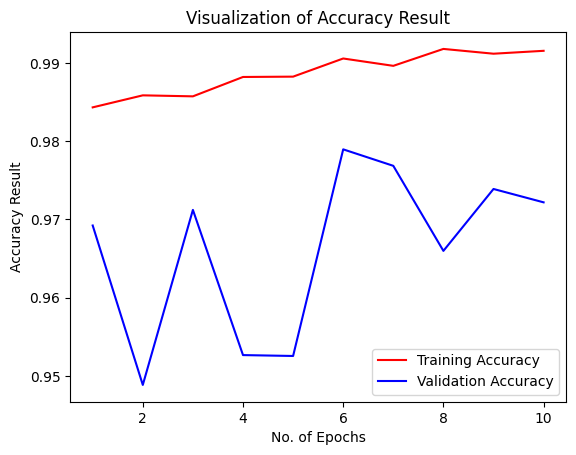

In [25]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [26]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data, 'valid'),
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [28]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step


(array([[9.99999881e-01, 9.15786405e-11, 1.59003203e-12, ...,
         1.32200154e-17, 2.13606314e-15, 3.40960102e-14],
        [9.99734342e-01, 2.06303756e-08, 1.83890381e-09, ...,
         8.96301436e-12, 2.64900862e-11, 4.62892141e-10],
        [1.00000000e+00, 2.12418145e-17, 1.29295493e-17, ...,
         8.14632794e-25, 4.99711521e-21, 1.95367922e-18],
        ...,
        [1.35321105e-12, 3.63127763e-16, 2.43861333e-12, ...,
         3.57951624e-13, 1.03736707e-15, 1.00000000e+00],
        [8.35422226e-14, 7.38746651e-18, 6.33940600e-14, ...,
         1.24171168e-13, 1.85460458e-16, 1.00000000e+00],
        [3.99170351e-19, 9.64500391e-25, 7.93986598e-21, ...,
         2.88186464e-22, 1.04563122e-22, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [29]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [30]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [31]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [32]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.96      0.96       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.99       440
                                   Apple___healthy       0.92      0.99      0.95       502
                               Blueberry___healthy       0.99      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.98      0.97       421
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.93      0.94       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

In [35]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[482,   4,   0, ...,   0,   0,   0],
       [  3, 492,   0, ...,   0,   0,   0],
       [  0,   0, 436, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  0,   0,   1, ...,   0,   0, 478]])

### Confusion Matrix Visualization

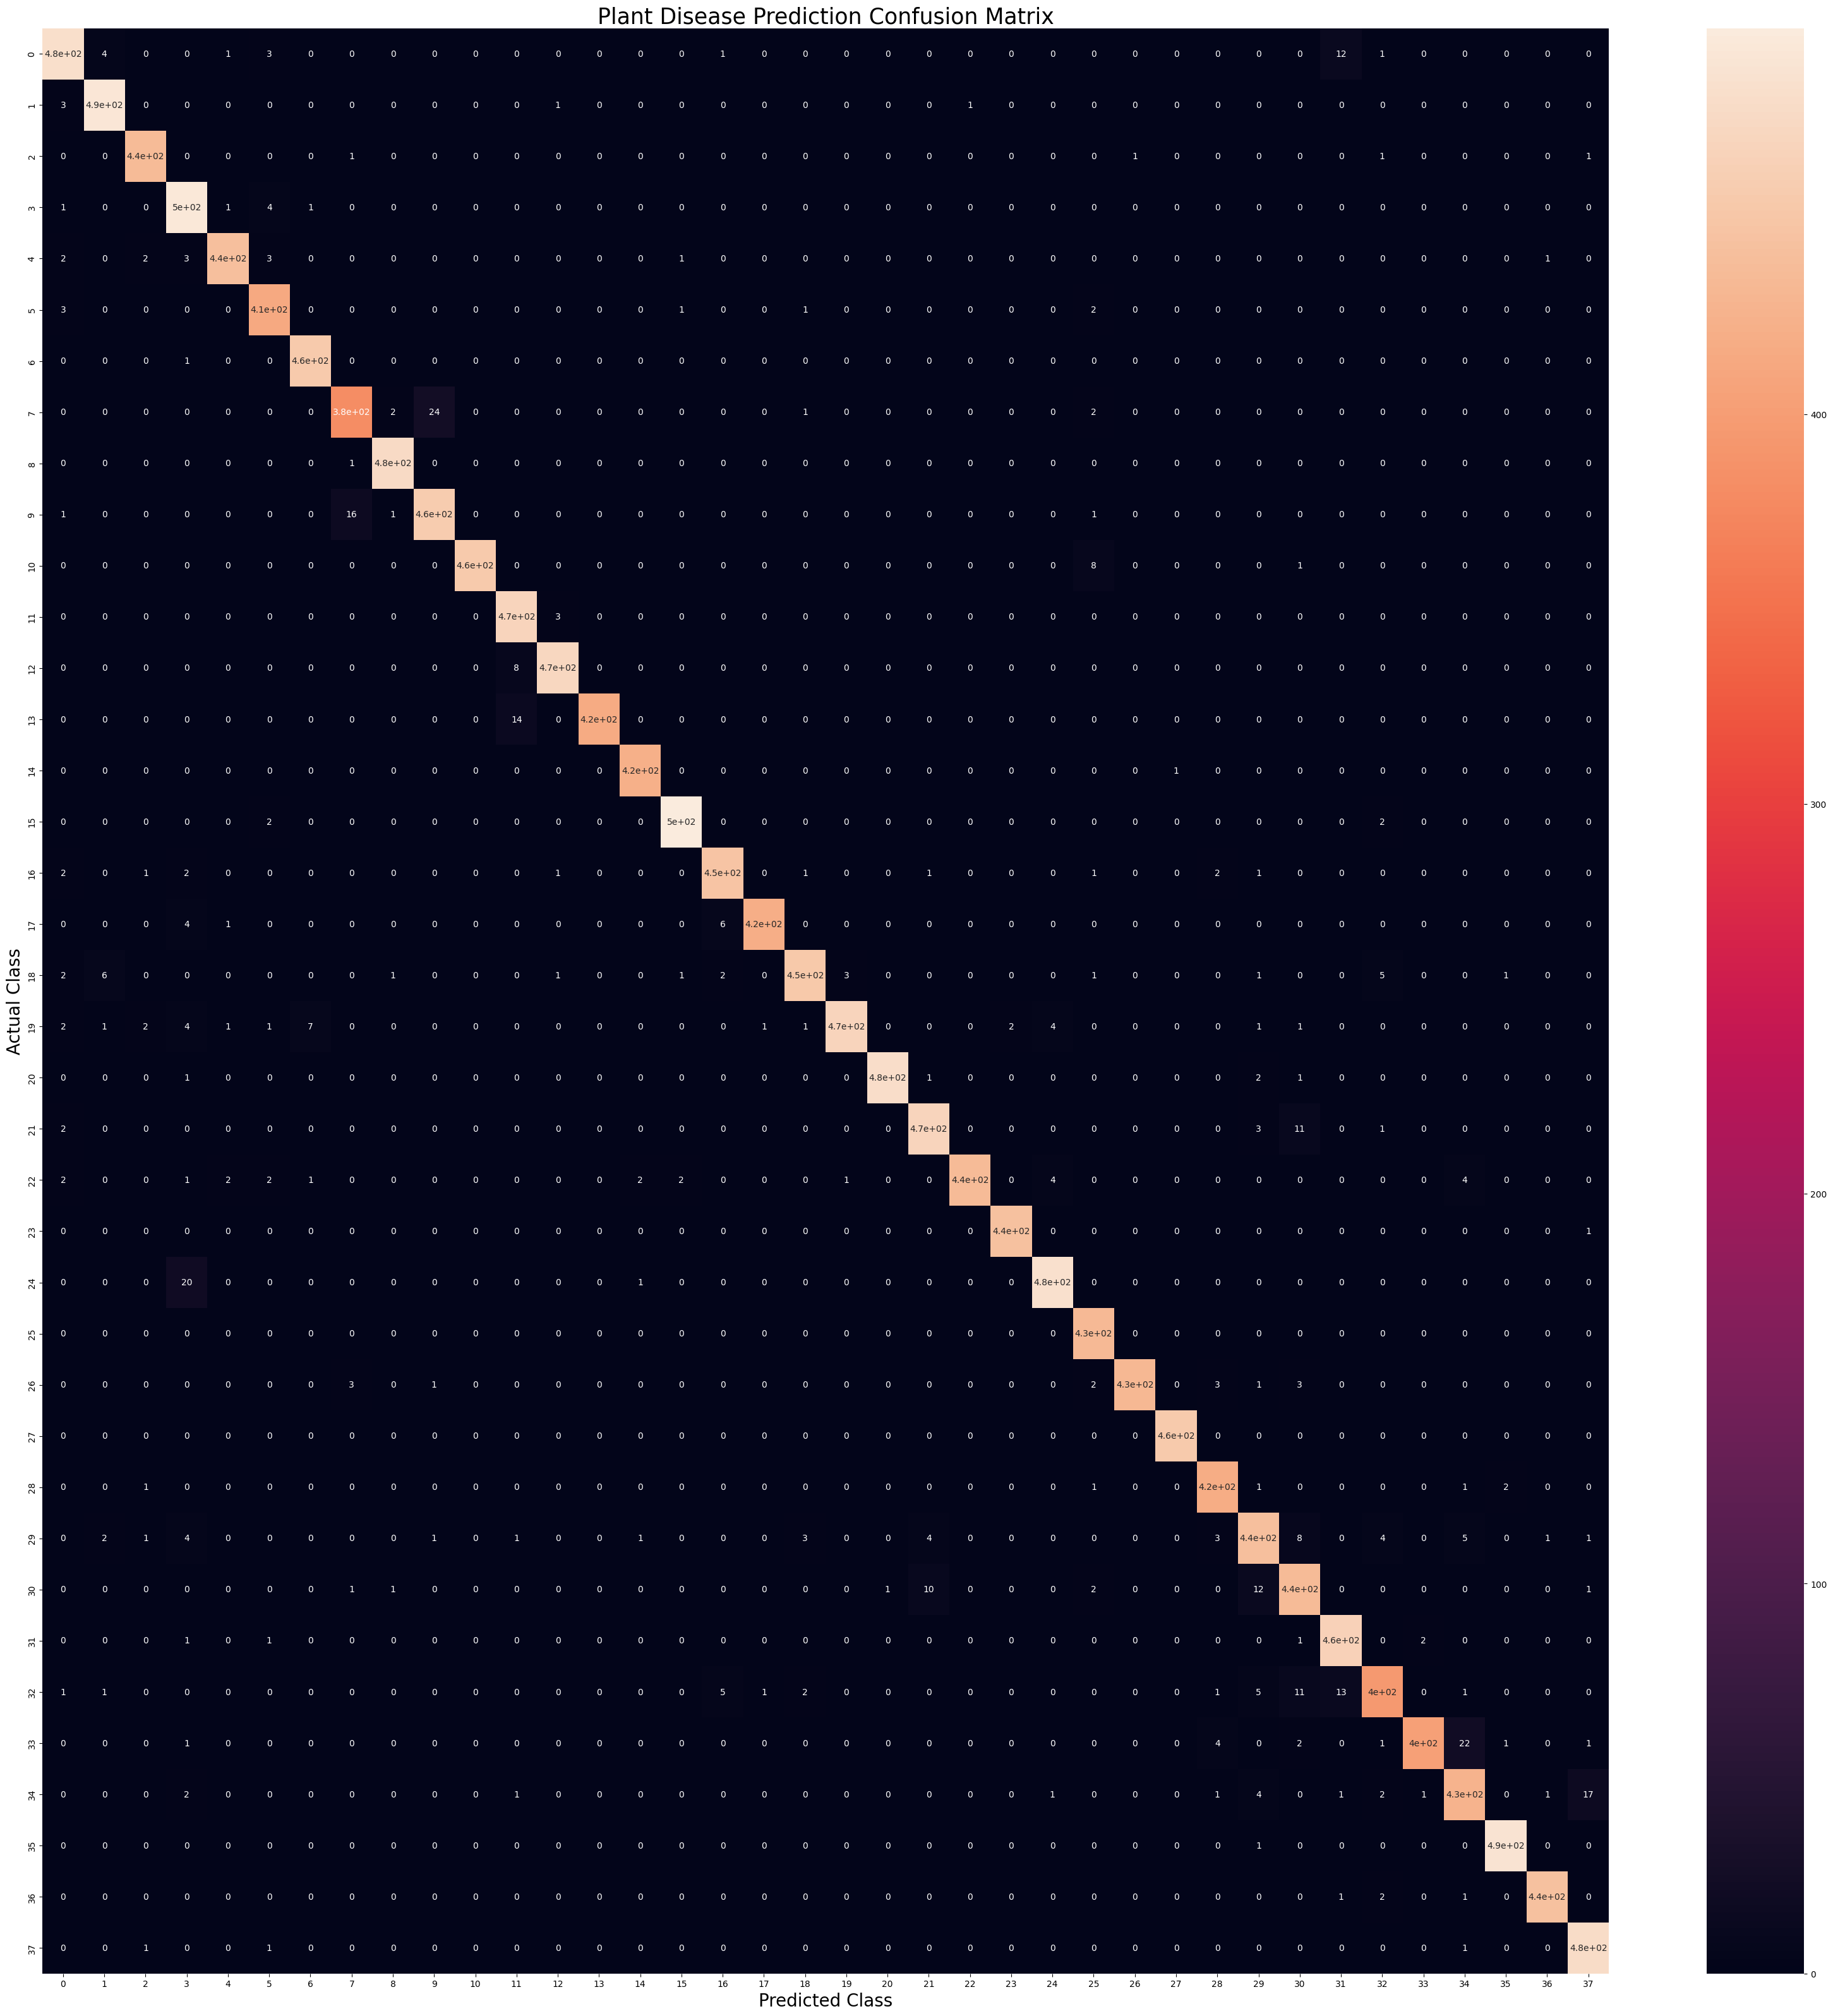

In [36]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()